# Определение перспективного тарифа для телеком компании
Описание проекта
«Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нужно предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**
Тариф «Смарт»

Ежемесячная плата: 550 рублей<br>
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика<br>
Стоимость услуг сверх тарифного пакета:<br>
минута разговора: 3 рубля<br>
сообщение: 3 рубля<br>
1 Гб интернет-трафика: 200 рублей<br>
Тариф «Ультра»<br>

Ежемесячная плата: 1950 рублей<br>
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика<br>
Стоимость услуг сверх тарифного пакета:<br>
минута разговора: 1 рубль<br>
сообщение: 1 рубль<br>
1 Гб интернет-трафика: 150 рублей<br>
Внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.<br>

**Описание данных**

Таблица users (информация о пользователях):<br>
user_id — уникальный идентификатор пользователя<br>
first_name — имя пользователя<br>
last_name — фамилия пользователя<br>
age — возраст пользователя (годы)<br>
reg_date — дата подключения тарифа (день, месяц, год)<br>
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
city — город проживания пользователя<br>
tariff — название тарифного плана<br>

**Таблица calls (информация о звонках):<br>**
id — уникальный номер звонка<br>
call_date — дата звонка<br>
duration — длительность звонка в минутах<br>
user_id — идентификатор пользователя, сделавшего звонок<br>

**Таблица messages (информация о сообщениях):<br>**
id — уникальный номер сообщения<br>
message_date — дата сообщения<br>
user_id — идентификатор пользователя, отправившего сообщение<br>

**Таблица internet (информация об интернет-сессиях):<br>**
id — уникальный номер сессии<br>
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)<br>
session_date — дата интернет-сессии<br>
user_id — идентификатор пользователя<br>

**Таблица tariffs (информация о тарифах):<br>**
tariff_name — название тарифа<br>
rub_monthly_fee — ежемесячная абонентская плата в рублях<br>
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату<br>
messages_included — количество сообщений в месяц, включённых в абонентскую плату<br>
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)<br>
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)<br>
rub_per_message — стоимость отправки сообщения сверх тарифного пакета<br>
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)<br>



# Общая информация

**Изучение данных из файла tariffs**

In [91]:
#импортируем необходимые библиотеки
import pandas as pd
from IPython.display import display
from functools import reduce
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy


In [92]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
display(tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 

Отлично, увидел.
</div>

Для удобства переведем мегабайты в гигабайты, чтобы вести все дальнейшие расчеты в ГБ, т.к. сверх тарифа идет ст-ть ГБ. 2. Поменяем название столбца 'rub_monthly_fee' на 'price_month' для удобного чтения и порядок столбцов для наглядности.

In [93]:
tariffs['gb_included']=(tariffs['mb_per_month_included']/1024).astype('int64')
tariffs = tariffs.rename(columns={'rub_monthly_fee': 'price_month'})
tariffs=tariffs[['tariff_name', 'messages_included', 'gb_included', 'minutes_included', 'price_month', 'rub_per_gb', 'rub_per_message', 'rub_per_minute']]
display(tariffs.head())

,tariff_name,messages_included,gb_included,minutes_included,price_month,rub_per_gb,rub_per_message,rub_per_minute
0,smart,50,15,500,550,200,3,3
1,ultra,1000,30,3000,1950,150,1,1


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 

Здорово, все четко и ясно)
</div>

# Изучение данных из файла calls

In [94]:
calls = pd.read_csv('/datasets/calls.csv')
display(calls.head())
calls.info()
calls.describe()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [95]:
calls.query('duration == 0')['duration'].count()

39613

1. Есть звонки продолжительностью 0 минут, это, скорее всего, неотвеченные<br> 
2. Не будем их убирать, они никак не повлияют.<br>
3. Пропущенных значений нет.<br>
4. Надо перевести время в формат даты, чтобы потом разделить по месяцам.<br>
5. Время звонка округлить до целого в большую сторону.<br> 
6. Добавим столбец с месяцем.<br> 
7. Переведем время в int.<br> 
8. Оставим только нужные столбцы - идентиф.пользователя, месяц и время звонка.<br> 
9. Сгруппируем полученную таблицу по id пользователя и месяца.<br>

# Предобработка данных calls

In [96]:
calls = calls.drop_duplicates() # удалим дубликаты в таблице
calls.info() # проверим кол-во оставшихся строк

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 7.7+ MB


In [97]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month #добавим месяц
calls['duration'] = numpy.ceil(calls['duration']).astype('Int64') #округляем до целого в большую сторону

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b> 

Увидел, отлично)
</div>

In [98]:
display(calls.head())
calls.info()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


<class 'pandas.core.frame.DataFrame'>
Int64Index: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  Int64         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: Int64(1), datetime64[ns](1), int64(2), object(1)
memory usage: 9.5+ MB


In [99]:
calls=calls[['user_id', 'month', 'duration']]
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202607 entries, 0 to 202606
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   202607 non-null  int64
 1   month     202607 non-null  int64
 2   duration  202607 non-null  Int64
dtypes: Int64(1), int64(2)
memory usage: 6.4 MB


In [100]:
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()     
calls_pivot = calls_pivot.rename(columns={'duration': 'sum_minut'})
display(calls_pivot.head())
calls_pivot.info()

,user_id,month,sum_minut
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    3174 non-null   int64
 1   month      3174 non-null   int64
 2   sum_minut  3174 non-null   Int64
dtypes: Int64(1), int64(2)
memory usage: 77.6 KB


1. Данные по звонкам преобразованы <br>
2. Таблица содержит идентиф.пользователя, месяц и сумму минут за месяц.<br> 
3. Строки сократились до 3174.<br>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 
    
Отличное решение!
</div>

# Изучение данных из файла messages

In [101]:
messages = pd.read_csv('/datasets/messages.csv')
display(messages.head())
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


1. Пропущенных значений нет. 
2. Надо перевести время в формат даты, чтобы потом разделить по месяцам. 
3. Добавим столбец с месяцем. 
4. Сгруппируем полученную таблицу по id пользователя и месяцам.

# Предобработка данных messages

In [102]:
messages = messages.drop_duplicates() # удалим дубликаты в таблице
messages.info() # проверим кол-во оставшихся строк

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.8+ MB


In [103]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month #добавим месяц
display(messages.head())
messages.info()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


<class 'pandas.core.frame.DataFrame'>
Int64Index: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.7+ MB


In [104]:
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count').reset_index()     
display(messages_pivot.head())
messages_pivot.info()

,user_id,month,message_date
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       2717 non-null   int64
 1   month         2717 non-null   int64
 2   message_date  2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB


In [105]:
messages_pivot = messages_pivot.rename(columns={'message_date': 'sum_message'}) #поменяем название для удобства
#чтобы название соответствовало содержимому
messages_pivot.head()

,user_id,month,sum_message
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


1. Данные по кол-ву сообщений преобразованы 
2. Таблица содержит идентиф.пользователя, месяц и кол-во сообщений за месяц по каждому абоненту. 
3. Строки сократились до 2717.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 
    
Супер, данные по сообщениям обработаны и агрегированы верно!)
</div>

# Изучение данных из файла internet

In [106]:
internet = pd.read_csv('/datasets/internet.csv')
display(internet['mb_used'])
display(internet['mb_used'].describe())
internet.info()

0          112.95
1         1052.81
2         1197.26
3          550.27
4          302.56
           ...   
149391     318.90
149392     490.13
149393       0.00
149394    1246.32
149395     544.37
Name: mb_used, Length: 149396, dtype: float64

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


1. Пропущенных значений нет. 
2. Надо перевести время в формат даты, чтобы потом разделить по месяцам.
3. Добавим столбец с месяцем. 
4. Интернет переведем в ГБ, т.к. перерасход начисляется за гигабайты и преобразуем в int с округлением в большую сторону. 
5. Сгруппируем полученную таблицу по id пользователя и месяцам.

In [107]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [108]:
internet = internet.drop_duplicates() # удалим дубликаты в таблице
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
#добавим месяц
internet['month'] = internet['session_date'].dt.month 
#internet['gb_used']=internet['mb_used'] / 1024
# округляю количество мб до целого большего
#internet['mb_used']=round(internet['mb_used'].astype('int64')+0.45)
#internet['gb_used'] = numpy.ceil(internet['gb_used']).astype('Int64')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 

Все верно, на данном шаге переводить и округлять мегабайты немного неправильно, потому что в дальнейшем при обработке данных такие цифры считаются немного неверно)
</div>

In [109]:
internet=internet[['user_id', 'month', 'mb_used']]
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  149396 non-null  int64  
 1   month    149396 non-null  int64  
 2   mb_used  149396 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 4.6 MB


In [110]:
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()     
display(internet_pivot.head())
internet_pivot.info()

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  3203 non-null   int64  
 1   month    3203 non-null   int64  
 2   mb_used  3203 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB


In [111]:
internet_pivot = internet_pivot.rename(columns={'mb_used': 'sum_mb'}) 
internet_pivot.head()

,user_id,month,sum_mb
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


1. Данные по кол-ву ГБ преобразованы 
2. Таблица содержит идентиф.пользователя, месяц и кол-во ГБ за месяц по каждому абоненту. 
3. Строки сократились до 3203.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v4:</b> 

В ячейку ниже добавляем перевод мегабайтов в гигабайты (после всех преобразований ранее) и округление.
</div>



In [123]:
###### КОД РЕВЬЮЕРА ######
internet_pivot['sum_mb'] /= 1024
internet_pivot['sum_mb'] = np.ceil(internet_pivot['sum_mb'])
internet_pivot = internet_pivot.rename(columns={'sum_mb': 'sum_gb'})
internet_pivot.head()
###### КОД РЕВЬЮЕРА ######

,user_id,month,sum_gb
0,1000,5,1.0
1,1000,6,1.0
2,1000,7,1.0
3,1000,8,1.0
4,1000,9,1.0


# Изучение данных из файла users

In [124]:
users = pd.read_csv('/datasets/users.csv')
display(users.head())
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


1. Есть пропущенные значения в дате прекращения тарифа, т.к. большинство тарифов еще действовало. 
2. Оставляем только нужные для анализа столбцы - идентиф.абонента, тариф и город.

# Предобработка данных users

In [125]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

In [126]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b> 

Молодец, хорошо!
</div>

# Объединение таблиц

In [127]:
#Обьеденяем таблицы звонков и сообщений
data=calls_pivot.merge(messages_pivot, on=['user_id', 'month'], how='outer')
display(data.head())
data.info()

,user_id,month,sum_minut,sum_message
0,1000,5,159,22.0
1,1000,6,172,60.0
2,1000,7,340,75.0
3,1000,8,408,81.0
4,1000,9,466,57.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213 entries, 0 to 3212
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      3213 non-null   int64  
 1   month        3213 non-null   int64  
 2   sum_minut    3174 non-null   Int64  
 3   sum_message  2717 non-null   float64
dtypes: Int64(1), float64(1), int64(2)
memory usage: 128.6 KB


In [128]:
#Объединим полученную таблицу с таблицей интернета
data=data.merge(internet_pivot, on=['user_id', 'month'], how='outer')
display(data.head())
data.info()

,user_id,month,sum_minut,sum_message,sum_gb
0,1000,5,159,22.0,1.0
1,1000,6,172,60.0,1.0
2,1000,7,340,75.0,1.0
3,1000,8,408,81.0,1.0
4,1000,9,466,57.0,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      3214 non-null   int64  
 1   month        3214 non-null   int64  
 2   sum_minut    3174 non-null   Int64  
 3   sum_message  2717 non-null   float64
 4   sum_gb       3203 non-null   float64
dtypes: Int64(1), float64(2), int64(2)
memory usage: 153.8 KB


In [129]:
#Объединим полученную таблицу с таблицей абонентов
data=data.merge(users, on=['user_id'], how='outer')
display(data.head())
data.info()

,user_id,month,sum_minut,sum_message,sum_gb,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,159,22.0,1.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,172,60.0,1.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,340,75.0,1.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,408,81.0,1.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,466,57.0,1.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      3216 non-null   int64         
 1   month        3214 non-null   float64       
 2   sum_minut    3174 non-null   Int64         
 3   sum_message  2717 non-null   float64       
 4   sum_gb       3203 non-null   float64       
 5   age          3216 non-null   int64         
 6   churn_date   189 non-null    datetime64[ns]
 7   city         3216 non-null   object        
 8   first_name   3216 non-null   object        
 9   last_name    3216 non-null   object        
 10  reg_date     3216 non-null   datetime64[ns]
 11  tariff       3216 non-null   object        
dtypes: Int64(1), datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 329.8+ KB


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 

Все объединения таблиц ты произвел правильно, молодец! Не забывай, что нам не всегда стоит использовать `outer`.
</div>

В итоговой таблице есть попущенные значения и float - Заменим отсутствующие значения на 0 и переведем количественные столбцы в int

In [130]:
data = data.fillna(
    {
        'sum_message':0,
        'sum_minut':0,
        'sum_gb':0,
        'month':0,
        }
)

data = data.astype(
    {
        'sum_message':'int',
        'sum_minut':'int',
        'sum_gb':'int',
        'month':'int',
        }
)
data=data.query('month > 0')

In [131]:
display(data.head())
data.info()

,user_id,month,sum_minut,sum_message,sum_gb,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159,22,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172,60,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340,75,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408,81,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466,57,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      3214 non-null   int64         
 1   month        3214 non-null   int64         
 2   sum_minut    3214 non-null   int64         
 3   sum_message  3214 non-null   int64         
 4   sum_gb       3214 non-null   int64         
 5   age          3214 non-null   int64         
 6   churn_date   187 non-null    datetime64[ns]
 7   city         3214 non-null   object        
 8   first_name   3214 non-null   object        
 9   last_name    3214 non-null   object        
 10  reg_date     3214 non-null   datetime64[ns]
 11  tariff       3214 non-null   object        
dtypes: datetime64[ns](2), int64(6), object(4)
memory usage: 326.4+ KB


Итоговая таблица преобразована - В ней содержится вся информация по минутам, сообщениям и гигабайтам, по каждому абоненту ежемесячно.

# Помесячная выручка с каждого пользователя

In [132]:
tariffs.head()

,tariff_name,messages_included,gb_included,minutes_included,price_month,rub_per_gb,rub_per_message,rub_per_minute
0,smart,50,15,500,550,200,3,3
1,ultra,1000,30,3000,1950,150,1,1


In [133]:
def price(df):
    sum_minut = df['sum_minut']
    sum_message = df['sum_message']
    sum_gb = df['sum_gb']
    tariff = df['tariff']
    if tariff == 'smart':
        if sum_minut > 500:
            price_min=(sum_minut-500)*3 #стоимость минут потраченных сверх тарифа
        else:
            price_min = 0
        if sum_message > 50:
            price_message=(sum_message-50)*3 #стоимость сообщений потраченных сверх тарифа
        else:
            price_message = 0
        if sum_gb > 15:
            price_gb=(sum_gb-15)*200 #стоимость гб потраченных сверх тарифа
        else:
            price_gb = 0
        return price_min + price_message + price_gb + 550 #цена за месяц: тариф + потраченное сверху
    elif tariff == 'ultra':
        if sum_minut > 3000:
            price_min=sum_minut-3000 #стоимость минут потраченных сверх тарифа
        else:
            price_min = 0
        if sum_message > 1000:
            price_message=sum_message-1000 #стоимость сообщений потраченных сверх тарифа
        else:
            price_message = 0
        if sum_gb > 30:
            price_gb=(sum_gb-30)*150 #стоимость гб потраченных сверх тарифа
        else:
            price_gb = 0
        return price_min + price_message + price_gb + 1950 #цена за месяц: тариф + потраченное сверху
            
  
   
data['price_month'] =  data.apply(price, axis=1) #новый столбец, функцию ко всей строке

In [134]:
#проверим результат
display(data.head()) 
data.info()

,user_id,month,sum_minut,sum_message,sum_gb,age,churn_date,city,first_name,last_name,reg_date,tariff,price_month
0,1000,5,159,22,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
1,1000,6,172,60,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
2,1000,7,340,75,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
3,1000,8,408,81,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
4,1000,9,466,57,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      3214 non-null   int64         
 1   month        3214 non-null   int64         
 2   sum_minut    3214 non-null   int64         
 3   sum_message  3214 non-null   int64         
 4   sum_gb       3214 non-null   int64         
 5   age          3214 non-null   int64         
 6   churn_date   187 non-null    datetime64[ns]
 7   city         3214 non-null   object        
 8   first_name   3214 non-null   object        
 9   last_name    3214 non-null   object        
 10  reg_date     3214 non-null   datetime64[ns]
 11  tariff       3214 non-null   object        
 12  price_month  3214 non-null   int64         
dtypes: datetime64[ns](2), int64(7), object(4)
memory usage: 351.5+ KB


**Вывод**: Вот такая таблица готова к анализу

# Анализ результатов

In [135]:
tariffs.head()

,tariff_name,messages_included,gb_included,minutes_included,price_month,rub_per_gb,rub_per_message,rub_per_minute
0,smart,50,15,500,550,200,3,3
1,ultra,1000,30,3000,1950,150,1,1


# Анализ тарифа ULTRA

In [136]:
ultra=data.query('tariff == "ultra"')
ultra.describe()

,user_id,month,sum_minut,sum_message,sum_gb,age,price_month
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.0
mean,1263.094416,8.250761,526.623350,49.363452,0.988832,46.834518,1950.0
std,140.694908,2.871762,317.606098,47.804457,0.105138,17.107979,0.0
min,1000.000000,1.000000,0.000000,0.000000,0.000000,18.000000,1950.0
25%,1143.000000,6.000000,284.000000,6.000000,1.000000,30.000000,1950.0
50%,1277.000000,9.000000,518.000000,38.000000,1.000000,45.000000,1950.0
75%,1381.000000,11.000000,752.000000,79.000000,1.000000,63.000000,1950.0
max,1495.000000,12.000000,1673.000000,224.000000,1.000000,75.000000,1950.0


In [137]:
user_ultra_30 = ultra.query('sum_gb>30')['sum_gb'].count()
user_ultra_30 

0

In [138]:
user_ultra_30 / 985

0.0

Вывод пользователи тарифа Ультра потребляют больше услуг и платят больше. Пользователи тарифа смарт не хватает выделенногообьема услуг, им приходиться докупать.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b> 

Хорошо, принимается.
</div>

In [139]:
ultra.head()

,user_id,month,sum_minut,sum_message,sum_gb,age,churn_date,city,first_name,last_name,reg_date,tariff,price_month
0,1000,5,159,22,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
1,1000,6,172,60,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
2,1000,7,340,75,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
3,1000,8,408,81,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
4,1000,9,466,57,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950


# Анализ ULTRA - минуты

In [140]:
import numpy as np
variance = np.var(ultra['sum_minut'], ddof=1)
print('Дисперсия - ', variance)
print('Отклонение - ', np.sqrt(variance))
print('Среднее - ', ultra['sum_minut'].mean())

Дисперсия -  100873.63339730098
Отклонение -  317.6060978591264
Среднее -  526.6233502538071


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 

Отлично, очень лаконично и понятно)
</div>

Text(0.5, 1.0, 'Анализ минут УЛЬТРА')

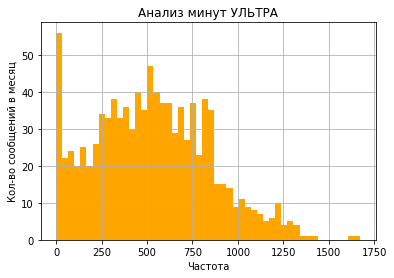

In [141]:
ultra['sum_minut'].hist(bins = 50, color = 'orange')
plt.ylabel("Кол-во сообщений в месяц")
plt.xlabel("Частота")
plt.title("Анализ минут УЛЬТРА")

Распределение скошено влево, распределение мультимодальное - Половина абонентов используют до 500 минут в месяц из возможных 3000 минут и 25% абонентов пользуются только 9% минут от лимита. - Часть пользователей минимально пользуются минутами, другие приложения с помощью интернета заменяют связь.

# Анализ ULTRA - сообщения

Text(0.5, 1.0, 'Анализ сообщений УЛЬТРА')

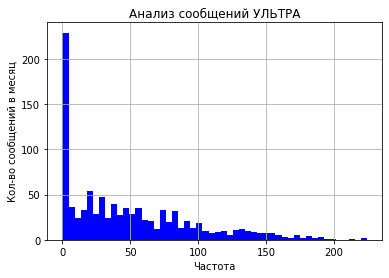

In [142]:
ultra['sum_message'].hist(bins = 50, color = 'blue')
plt.ylabel("Кол-во сообщений в месяц")
plt.xlabel("Частота")
plt.title("Анализ сообщений УЛЬТРА")

In [143]:
variance = np.var(ultra['sum_message'], ddof=1)
print('Дисперсия - ', variance)
print('Отклонение - ', np.sqrt(variance))
print('Среднее - ', ultra['sum_message'].mean())

Дисперсия -  2285.2661425446736
Отклонение -  47.804457350174715
Среднее -  49.36345177664975


По тарифу УЛЬТРА лимит сообщений в месяц - 1000      - Распределение скошено влево, 50% абонентов используют в месяц до 38 сообщений, что около 4% от лимита. - 25% абонентов отправляют до 6 сообщений в месяц, что меньше 1% от лимита, на графике это выглядит как выброс. - обычные сообщения часто заменяются телеграмом, ватсапом и др, т.е. посредством интернета. - сообщения меньше всего интересуют клиентов.     

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 

Отличный вывод!
</div>

# Анализ ULTRA - интернет

In [144]:
variance = np.var(ultra['sum_gb'], ddof=1)
print('Дисперсия - ', variance)
print('Отклонение - ', np.sqrt(variance))
print('Среднее - ', ultra['sum_gb'].mean())

Дисперсия -  0.011054021707729768
Отклонение -  0.1051381077808126
Среднее -  0.9888324873096447


Text(0.5, 1.0, 'Кол-во ГБ в месяц')

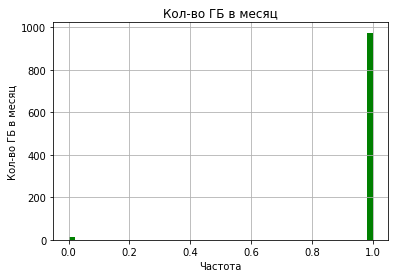

In [145]:
ultra['sum_gb'].hist(bins = 50,color = 'green')
plt.ylabel("Кол-во ГБ в месяц") 
plt.xlabel("Частота")
plt.title("Кол-во ГБ в месяц")

По тарифу УЛЬТРА лимит интернета - 30 гб - Распределение нормальное, т.к. интернетом пользуются полноценно, звонки и сообщения часто через приложения и соответственно при помощи интернета. - Лимит интернета является почти средним в этом распределении.     - 30 гб чуть ниже среднего, больше половины абонентов превышают лимит, очень выгодная ситуация для сотового оператора.     

In [146]:
gb_ultra=(1-1950*(ultra['month'].count()) /ultra['price_month'].sum())*100
gb_ultra

0.0

49% от выручки по тарифу УЛЬТРА составляет дополнительный интернет      - минуты входят в стоимость, никто из абонентов не тратит доп.минуты, - сообщения входят в стоимость, никто из абонентов не тратит доп.сообщения, - половину выручки по тарифу составляет дополнительный интернет.     

# Анализ тарифа SMART

In [147]:
tariffs

,tariff_name,messages_included,gb_included,minutes_included,price_month,rub_per_gb,rub_per_message,rub_per_minute
0,smart,50,15,500,550,200,3,3
1,ultra,1000,30,3000,1950,150,1,1


In [148]:
data_smart=data.query('tariff == "smart"')
data_smart.describe()

,user_id,month,sum_minut,sum_message,sum_gb,age,price_month
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1246.506505,8.346792,417.934948,33.384029,0.999103,46.556303,692.216689
std,146.119496,2.920316,190.313730,28.227876,0.029948,16.353371,261.019619
min,1001.000000,1.000000,0.000000,0.000000,0.000000,18.000000,550.000000
25%,1121.000000,6.000000,282.000000,10.000000,1.000000,32.000000,550.000000
50%,1239.000000,9.000000,422.000000,28.000000,1.000000,47.000000,550.000000
75%,1376.000000,11.000000,545.000000,51.000000,1.000000,62.000000,715.000000
max,1499.000000,12.000000,1435.000000,143.000000,1.000000,75.000000,3397.000000


In [149]:
user_smart_15 = data_smart.query('sum_gb>15')['sum_gb'].count()
user_smart_15

0

**2113 раз был превышен лимит 15 ГБ**

In [150]:
user_smart_15/2229

0.0

**в 95% наблюдений был превышен лимит 15 ГБ**

In [151]:
user_smart_30 = data_smart.query('sum_gb>30')['sum_gb'].count()
user_smart_30

0

**1803 раз был превышен лимит 30 ГБ**

In [152]:
user_smart_30/2229

0.0

**в 81% наблюдений был превышен лимит 30 ГБ**   

**В тариф СМАРТ входит 50 сообщений, 15 ГБ, 500 минут, абонент плата - 550 руб.**      - 25% абонентов используют доп.сообщения, - Больше 75% абонентов используют дополнительный интернет, - Средний показатель ежемес.объема интернета почти в 3 раза превышает лимит. - Более 25% абонентов используют дополнительные минуты. - Средний ежемесячный чек в 11 раз превышает абонентскую плату. - 94% наблюдений - больше 15 ГБ, т.е. вышли за лимит - 81% - больше 30 ГБ, это необходимо для сравнения с поведением абонементов УЛЬТРА    

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 

Очень здорово, хороший вывод)
</div>

# Анализ SMART минуты

In [153]:
ariance = np.var(data_smart['sum_minut'], ddof=1)
print('Дисперсия - ', variance)
print('Отклонение - ', np.sqrt(variance))
print('Среднее - ', data_smart['sum_minut'].mean())

Дисперсия -  0.011054021707729768
Отклонение -  0.1051381077808126
Среднее -  417.9349484073576


Text(0.5, 1.0, 'Анализ минут СМАРТ')

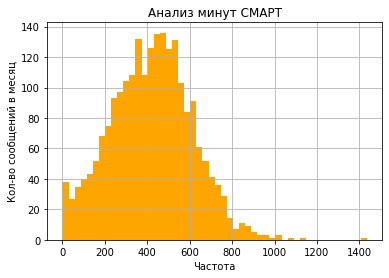

In [154]:
data_smart['sum_minut'].hist(bins = 50, color = 'orange')
plt.ylabel("Кол-во сообщений в месяц")
plt.xlabel("Частота")
plt.title("Анализ минут СМАРТ")

Распределение нормальное - Среднее кол-во минут стремится к ежемесячному лимиту и при этом среднее отклонение составляет 35% от лимита - Абоненты не укладываются в лимит, и оплачивают доп.минуты.

Посчитаем % отношение выручки от доп.минут к общей выручке   

In [155]:
min_smart=data_smart.query('sum_minut > 500')['sum_minut'].sum() - data_smart.query('sum_minut > 500')['sum_minut'].count() * 500
print(min_smart) #кол-во дополнительных минут
(min_smart*3)/(2229*550)

92739


0.2269399241404625

**Выручка от доп.минут составляет 22,3% к абоненской плате**        

# Анализ SMART сообщения

In [156]:
variance = np.var(data_smart['sum_message'], ddof=1)
print('Дисперсия - ', variance)
print('Отклонение - ', np.sqrt(variance))
print('Среднее - ', data_smart['sum_message'].mean())

Дисперсия -  796.8129584480083
Отклонение -  28.22787555676141
Среднее -  33.384028712427096


Text(0.5, 1.0, 'Анализ сообщений СМАРТ')

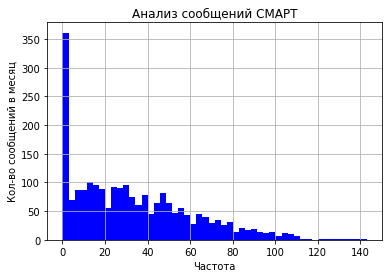

In [157]:
data_smart['sum_message'].hist(bins = 50, color = 'blue')
plt.ylabel("Кол-во сообщений в месяц")
plt.xlabel("Частота")
plt.title("Анализ сообщений СМАРТ")

Распределение скошено влево - 25% от всех месяцев использовали менее 10 сообщений, при наличии интернета сообщения становятся менее востребованными. - 75% - укладывались в лимит 50 сообщений - и только 25% пользовались доп.сообщениями. - Среднее немного больше среднего по лимиту (т.е. 25 сообщений из 50) - И с учетом отклонения 28, большая часть наблюдений укладывается в лимит.

In [158]:
mess_smart=data_smart.query('sum_message > 50')['sum_message'].sum() - data_smart.query('sum_message > 50')['sum_message'].count() * 50
print(mess_smart) #кол-во дополнительных сообщений
(mess_smart*3)/(2229*550)

12928


0.03163587421999266

**Выручка от доп.сообщений составляет 3% к абонентской плате**

In [159]:
mess_smart=data_smart.query('sum_message > 50')['sum_message'].sum() - data_smart.query('sum_message > 50')['sum_message'].count() * 50
print(mess_smart) #кол-во дополнительных сообщений
((mess_smart*3)/data_smart['price_month'].sum())*100

12928


2.513624865598454

**Выручка от доп.сообщений составляет 0,3% ко всей выручке по тарифу**

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 

Хорошо, что ты решил посчитать такие интересные показатели, они помогут в дальнейшем при выборе наиболее прибыльного тарифа.
</div>

# Анализ SMART интернет

In [160]:
variance = np.var(data_smart['sum_gb'], ddof=1)
print('Дисперсия - ', variance)
print('Отклонение - ', np.sqrt(variance))
print('Среднее - ', data_smart['sum_gb'].mean())

Дисперсия -  0.0008968606253619458
Отклонение -  0.029947631381495695
Среднее -  0.9991027366532077


Text(0.5, 1.0, 'Анализ интернета СМАРТ')

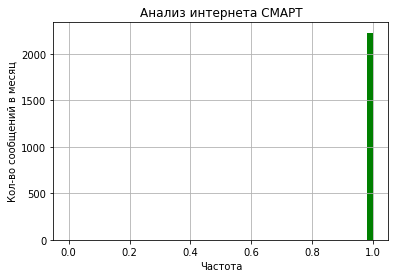

In [161]:
data_smart['sum_gb'].hist(bins = 50,color = 'green')
plt.ylabel("Кол-во сообщений в месяц")
plt.xlabel("Частота")
plt.title("Анализ интернета СМАРТ")

Распределение нормальное - 15 гб входящих в лимит ниже среднего, менее 25% наблюдений укладываются в лимит, это очень выгодная ситуация для сотового оператора. - Чем ниже среднего лимит, тем больше прибыли.

In [162]:
gb_smart=data_smart.query('sum_gb > 15')['sum_gb'].sum() - data_smart.query('sum_gb > 15')['sum_gb'].count() * 15
print(gb_smart) #кол-во дополнительных gb
((gb_smart*200)/data_smart['price_month'].sum())*100

0


0.0

Выручка от доп.gb интернета в 10 раз!!! больше выручки от тарифа по лимиту 

Вывод:
Пользователи тарифа Smart часто не вклиниваются в лимиты, чаще всего по кол-ству минут и очень много по лимиту мегабайт.
Пользователи тарифа Ultra практически не превышают лимитов, кроме мегабайт интернета.
Пользователи двух тарифов используют примерно одинаковые объемы интернета, особенно на пиках графиков.
В двух тарифак довольно много либо не пользуются отправкой сообщений, либо же используют в небольших кол-ствах до 5-10 сообщений.
Пользователи тарифа Ultra чаще всего не используют весь лимит по звонкам и сообщениям.



<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b> 

Супер, молодец!
</div>

# Проверка гипотез

1.Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Формируем гиротезы:

H0 -Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.
H1 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
Критический уровень статистической значимости 5%.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 

Теперь все верно, гипотезы сформулировал правильно.
</div>


In [163]:
alpha = 0.05
results = st.ttest_ind(ultra['price_month'], data_smart['price_month'], equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.0
Отвергаем нулевую гипотезу


p-значение очень маленькое - 3 деленное на 10 в 132 степени - Очень маленькая вероятность того что средние выручки равны. 

# Средняя выручка Москва и другие города

In [164]:
data.head()

,user_id,month,sum_minut,sum_message,sum_gb,age,churn_date,city,first_name,last_name,reg_date,tariff,price_month
0,1000,5,159,22,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
1,1000,6,172,60,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
2,1000,7,340,75,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
3,1000,8,408,81,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
4,1000,9,466,57,1,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950


In [165]:
print('Уникальные значения в столбце city')
print(data['city'].value_counts())

Уникальные значения в столбце city
Москва             611
Санкт-Петербург    270
Новосибирск         98
Уфа                 95
Краснодар           86
                  ... 
Сургут               6
Нижневартовск        6
Кемерово             5
Химки                5
Иваново              2
Name: city, Length: 76, dtype: int64


Средняя выручка по Москве и др.городам равны 5397 руб. и 5537 руб. - Средние выручки и действительно равны, есть небольшое различие - Пусть нулевая гипотеза звучит так - средние выручки равны - Альтернативная - не равны   

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 

Гипотезы сформулированы верно.
</div>

In [166]:
data_msk=data.query('city == "Москва"')
data_msk.describe()

,user_id,month,sum_minut,sum_message,sum_gb,age,price_month
count,611.000000,611.000000,611.000000,611.000000,611.0,611.000000,611.000000
mean,1268.872340,8.432079,469.150573,37.877250,1.0,44.906710,1147.859247
std,137.530432,2.888057,241.535044,37.160304,0.0,17.414978,640.861925
min,1001.000000,1.000000,0.000000,0.000000,1.0,18.000000,550.000000
25%,1171.000000,6.000000,304.000000,6.500000,1.0,29.000000,550.000000
50%,1291.000000,9.000000,453.000000,29.000000,1.0,43.000000,784.000000
75%,1385.000000,11.000000,620.500000,57.000000,1.0,58.000000,1950.000000
max,1490.000000,12.000000,1321.000000,191.000000,1.0,75.000000,2116.000000


In [167]:
data_no_msk=data.query('city != "Москва"')
data_no_msk.describe()

,user_id,month,sum_minut,sum_message,sum_gb,age,price_month
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000
mean,1247.533615,8.290434,447.041875,38.376104,0.995006,47.048790,1061.221283
std,146.011387,2.909368,241.852152,35.913289,0.070507,16.362308,613.162639
min,1000.000000,1.000000,0.000000,0.000000,0.000000,18.000000,550.000000
25%,1120.000000,6.000000,280.500000,9.500000,1.000000,34.000000,550.000000
50%,1241.000000,9.000000,440.000000,30.000000,1.000000,47.000000,676.000000
75%,1377.000000,11.000000,584.000000,57.000000,1.000000,62.000000,1950.000000
max,1499.000000,12.000000,1673.000000,224.000000,1.000000,75.000000,3397.000000


In [168]:
alpha = 0.05
results = st.ttest_ind(data_msk['price_month'], data_no_msk['price_month'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.0018497307474415958
Отвергаем нулевую гипотезу


Вывод: Вероятность составляет 28% - не получилось отвергнуть нулевую гиротезу. Можем сказать, что выручка по Москве и других регионам, по тарифу Смарт, почти не различается. Вернее, только исходя из проверки гипотезы мы не можем сказать, что больше, — только что количество выручки почти одинаково и входит в диапазон статистической значимости. Потому что гипотеза-то наша двухсторонняя: мы не знаем, в какую сторону оно отличается. Однако посчитав среднее количество выручки для Москвы и других регионов, с уверенностью можем сказать: выручка не отличается существенно.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b> 

Вижу, отличный вывод!
</div>

# Общий вывод

**Краткий обзор проведённой работы** 
1. Данные со звонками, сообщениями и интернетом, пользователями не содержали пропущенных значений, дубликатов не было. В таблице звонков была продолжительность 0.0 минут, это неотвеченные звонки , не имеет смысла их убирать, т.к. для анализа суммируем сумму минут за месяц.<br> 
2. Было проанализировано два тарифа Смарт и Ультра. - В СМАРТ входит 50 сообщений, 500 минут, 15 ГБ, абон.плата – 550 руб. - В УЛЬТРА входит 1000 сообщений, 3000 минут, 30 ГБ, абон.плата – 1950 руб.<br> 

**Анализ тарифов сотового оператора** 

1. Абоненты в обоих тарифах используют интернет значительно больше лимита. - В Ультра в среднем – 38 ГБ, максимально – 98 ГБ. - 63% из всех месяцев у абонентов УЛЬТРА был превышен лимит ГБ, т.е. было более 30 ГБ - В Смарте в среднем – 42 ГБ, максимально – 101 ГБ. - 94% из всех месяцев у абонентов СМАРТ - больше 15 ГБ, т.е. вышли за лимит - 81% из всех месяцев абоненты СМАРТ использовали более 30 ГБ.<br>
2. Т.е. в лимиты обоих тарифов входит существенная разница по минутам и сообщениям, а интернет отличатся на 15ГБ. Фактически абоненты обоих тарифов тратят похожее кол-во минут, сообщений абоненты Ультра тратят в среднем немного больше. А интернет абоненты Смарта тратят больше и при этом он для них по более дорогой цене. Более 81% месяцев по тарифу Смарт превышают лимит ГБ в два раза, т.е. за дополнительные 15 ГБ платят 3000. А это значит, что эти 81% - как минимум приносят оператору 3550 рублей при тех же условиях что и тариф УЛЬТРА. Т.е. вместо 1950 получается 3550. А если еще рассмотреть превышение 30 ГБ, то для сотового оператора абоненты Смарта становятся еще более выгодными, ведь они платят по 200 руб. за ГБ, а Ультра 150 руб. за ГБ. 3. Доп.минуты от абонентов Смарт также приносят прибыль сотовому оператору, а именно 22% от выручке по абон.плате. Получается что тариф, который дешевле почти в 4 раза выручки приносит больше, - средняя выручка от абонента в месяц: - УЛЬТРА – 3844 руб. - СМАРТ – 6247 руб.<br>

**Анализ тарифов и проверка гипотез показывает**, что различие это не случайное, а закономерное. Поведение пользователей двух тарифов мало отличается , а расценки разные, отсюда и разность в выручке. Средняя выручка по Москве и другим регионам практически не отличается.<br> 


**Рекомендация** 

Тариф Смарт приносит больше денег, а значит и корректировать рекламный бюджет надо в его пользу.


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 

Отличный вывод, ты хорошо обосновал, почему один тариф для оператора приносит больше, чем другой.
</div>